# Base import

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [18]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))

# Statistics

In [3]:
f = open('./output_women_cm_kg_bmi.json','r')
women_info = json.load(f)
f = open('./output_men_cm_kg_bmi.json','r')
man_info = json.load(f)

## Shirtsize

In [4]:
women_shirtsize = {}
for i in women_info:
    shirtsize = i['shirtsize']
    if shirtsize not in women_shirtsize.keys():
        women_shirtsize[shirtsize] = 1
    else:
        women_shirtsize[shirtsize] += 1
women_shirtsize_keys = list(women_shirtsize.keys())
women_shirtsize_values = list(women_shirtsize.values())

In [5]:
man_shirtsize = {}
for i in man_info:
    shirtsize = i['shirtsize']
    if shirtsize not in man_shirtsize.keys():
        man_shirtsize[shirtsize] = 1
    else:
        man_shirtsize[shirtsize] += 1
man_shirtsize_keys = list(man_shirtsize.keys())
man_shirtsize_values = list(man_shirtsize.values())

/home/xy/.pyenv/versions/anaconda3-5.1.0/envs/tf14/lib/python3.5/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


<BarContainer object of 10 artists>

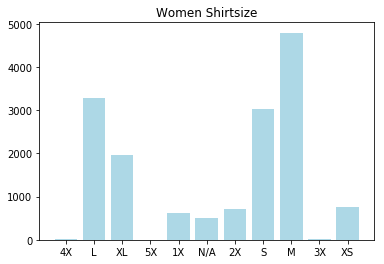

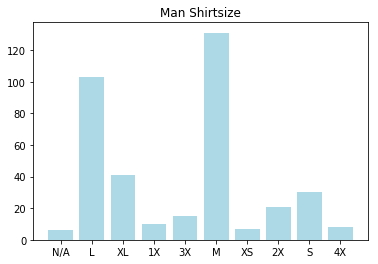

In [6]:
plt.figure(1)
plt.title('Women Shirtsize')
plt.bar(left=women_shirtsize_keys,height=women_shirtsize_values,color="lightblue")
plt.figure(2)
plt.title('Man Shirtsize')
plt.bar(left=man_shirtsize_keys,height=man_shirtsize_values,color="lightblue")

## Height & Weight

In [ ]:
women_height = {}
women_weight = {}
for i in women_info:
    if i['height'] not in women_height.keys():
        women_height[i['height']] = 1
    else:
        women_height[i['height']] += 1
    if i['weight'] not in women_weight.keys():
        women_weight[i['weight']] = 1
    else:
        women_weight[i['weight']] += 1
women_height_keys = list(women_height.keys())
women_height_values = list(women_height.values())
women_weight_keys = list(women_height.keys())
women_weight_values = list(women_height.values())

In [ ]:
man_height = {}
man_weight = {}
for i in man_info:
    if i['height'] not in man_height.keys():
        man_height[i['height']] = 1
    else:
        man_height[i['height']] += 1
    if i['weight'] not in man_weight.keys():
        man_weight[i['weight']] = 1
    else:
        man_weight[i['weight']] += 1
man_height_keys = list(man_height.keys())
man_height_values = list(man_height.values())
man_weight_keys = list(man_height.keys())
man_weight_values = list(man_height.values())

In [ ]:
plt.figure(1,figsize=(20,20))
plt.title('Women height')
plt.bar(left=women_height_keys,height=women_height_values,color="lightblue")
plt.figure(2,figsize=(20,20))
plt.title('Man height')
plt.bar(left=man_height_keys,height=man_height_values,color="lightblue")
plt.figure(3,figsize=(20,20))
plt.title('Women weight')
plt.bar(left=women_weight_keys,height=women_weight_values,color="lightblue")
plt.figure(4,figsize=(20,20))
plt.title('Man weight')
plt.bar(left=man_weight_keys,height=man_weight_values,color="lightblue")

## Show Image

In [ ]:
image_dir = './image_women/'
i = shirt_dict['XL'][514]
name = i['im_id']
path = os.path.join(image_dir,name)
im = cv2.imread(path)
plt.imshow(im)
plt.show()
print(i)

In [ ]:
image_dir = './image_women/'
name_list = os.listdir(image_dir)
name = name_list[23]
#name = '38000-38163-3.jpg'
path = os.path.join(image_dir,name)
im = cv2.imread(path)
print(type(im))
plt.imshow(im)
plt.show()

## Shape

In [3]:
image_dir = './output/image_men/'
name_list = os.listdir(image_dir)

men_x_ = []
men_y_ = []
for name in name_list:
    try:
        path = os.path.join(image_dir,name)
        im = cv2.imread(path)
        men_x_.append(im.shape[0])
        men_y_.append(im.shape[1])
        if im.shape[2] != 3:
            print(path)
    except Exception:
        print(path)
        
image_dir = './output/image_women/'
name_list = os.listdir(image_dir)

women_x_ = []
women_y_ = []
for name in name_list:
    try:
        path = os.path.join(image_dir,name)
        im = cv2.imread(path)
        women_x_.append(im.shape[0])
        women_y_.append(im.shape[1])
        if im.shape[2] != 3:
            print(path)
    except Exception:
        print(path)

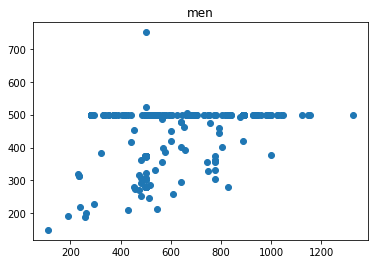

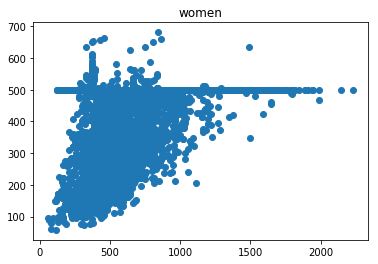

In [4]:
plt.figure(1)
plt.title('men')
plt.scatter(men_x_, men_y_)
plt.figure(2)
plt.title('women')
plt.scatter(women_x_, women_y_)

## find image error

In [1]:
import data_utils

In [2]:
data_utils.find_error_pil('./image_women/')
print('-----------')
data_utils.find_error_cv('./image_women/')
print('-----------')
data_utils.find_error_skimage('./image_women/')
print('-----------')
data_utils.find_type_error('./image_women/')

7173 29000-29802-2.jpg ()
cannot identify image file './image_women/38000-38163-3.jpg'
cant_open = 0
shape_len_not_3 = 1
shape_error = 0
-----------
9341 38000-38163-3.jpg
cant_open = 1
shape_len_not_3 = 0
shape_error = 0
-----------
Could not load "" 
Reason: "image file is truncated (4 bytes not processed)"
Please see documentation at: http://pillow.readthedocs.org/en/latest/installation.html#external-libraries
cannot identify image file <_io.BufferedReader name='./image_women/38000-38163-3.jpg'>
cant_open = 0
shape_len_not_3 = 0
shape_error = 0
-----------
cannot identify image file './image_women/38000-38163-3.jpg'
num_type_error: 0
gif: 0
num_jpg: 0
num_jpeg: 15695
num_png: 0


([],
 [],
 [],
 [(0, '34000-34201-1.jpg', 'JPEG'),
  (1, '25000-25173-3.jpg', 'JPEG'),
  (2, '14000-14471-1.jpg', 'JPEG'),
  (3, '23000-23520-2.jpg', 'JPEG'),
  (4, '20000-20540-1.jpg', 'JPEG'),
  (5, '11000-11567-8.jpg', 'JPEG'),
  (6, '24000-24048-4.jpg', 'JPEG'),
  (7, '10000-10443-5.jpg', 'JPEG'),
  (8, '9000-9061-1.jpg', 'JPEG'),
  (9, '38000-38008-1.jpg', 'JPEG'),
  (10, '30000-30230-5.jpg', 'JPEG'),
  (11, '18000-18021-1.jpg', 'JPEG'),
  (12, '40000-40073-1.jpg', 'JPEG'),
  (13, '40000-40143-2.jpg', 'JPEG'),
  (14, '14000-14809-2.jpg', 'JPEG'),
  (15, '36000-36685-4.jpg', 'JPEG'),
  (16, '24000-24231-1.jpg', 'JPEG'),
  (17, '30000-30873-1.jpg', 'JPEG'),
  (18, '24000-24011-4.jpg', 'JPEG'),
  (19, '23000-23802-2.jpg', 'JPEG'),
  (20, '9000-9363-9.jpg', 'JPEG'),
  (21, '19000-19311-2.jpg', 'JPEG'),
  (22, '12000-12663-3.jpg', 'JPEG'),
  (23, '8000-8113-1.jpg', 'JPEG'),
  (24, '17000-17044-3.jpg', 'JPEG'),
  (25, '16000-16631-1.jpg', 'JPEG'),
  (26, '36000-36275-1.jpg', 'JPEG'),
  

## Class number

0 偏瘦	<= 18.4  
1 正常	18.5 ~ 23.9   
2 过重	24.0 ~ 27.9  
3 肥胖	>= 28.0

In [13]:
import json
import matplotlib.pyplot as plt

In [21]:
f = open('./output/women_label_four_class.json','r')
women_info = json.load(f)
f = open('./output/men_label_four_class.json')
men_info = json.load(f)

In [35]:
class_ids_dict = {0:u"Thin",1:u"Nomal",2:u"Fat",3:u"Fater"}

In [22]:
len(women_info)

15707

In [23]:
len(men_info)

372

In [36]:
women_class_ids = {}
for key in women_info.keys():
    class_id = women_info[key]['label']
    class_id = class_ids_dict[class_id]
    if class_id not in women_class_ids:
        women_class_ids[class_id] = 0
    women_class_ids[class_id] += 1

men_class_ids = {}
for key in men_info.keys():
    class_id = men_info[key]['label']
    class_id = class_ids_dict[class_id]
    if class_id not in men_class_ids:
        men_class_ids[class_id] = 0
    men_class_ids[class_id] += 1

In [37]:
women_label_keys = list(women_class_ids.keys())
men_label_keys = list(men_class_ids.keys())
women_label_values = list(women_class_ids.values())
men_label_values = list(men_class_ids.values())

/home/xy/.pyenv/versions/anaconda3-5.0.1/envs/tensorflow/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


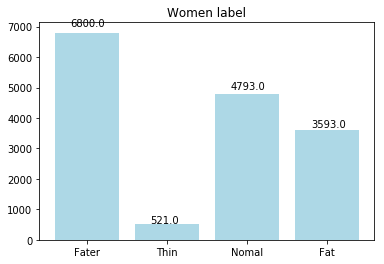

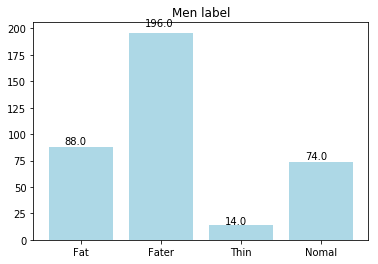

In [38]:
plt.figure(1)
plt.title('Women label')
a = plt.bar(left=women_label_keys,height=women_label_values,color="lightblue")
autolabel(a)
plt.figure(2)
plt.title('Men label')
a = plt.bar(left=men_label_keys,height=men_label_values,color="lightblue")
autolabel(a)